In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mittens
!pip install gingerit
!pip install tika
!pip install sentence-transformers

In [ ]:
import joblib
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/content/drive/MyDrive/Classroom/2021 Machine Learning 1 (CSL7550)/Project/Implementation')

from data_genration import data_prepare

In [ ]:
path = '/content/drive/MyDrive/Classroom/2021 Machine Learning 1 (CSL7550)/Project/Implementation/journals/kundu-2015-a.pdf'

cls = data_prepare()
proposed_paper = cls.extract_text(path)

test = proposed_paper['text'][0]

import successfully
/content/drive/MyDrive/Classroom/2021 Machine Learning 1 (CSL7550)/Project/Implementation/journals/kundu-2015-a.pdf


In [ ]:
# Load the model from the file
glove_model_saved = joblib.load('/content/drive/MyDrive/Classroom/2021 Machine Learning 1 (CSL7550)/Project/Implementation/glove_trained_J.pkl')

df_glove = glove_model_saved.fit_transform(test)

In [ ]:
  df_glove

,text,paper_title,Journal,cosine_score
0,structural equivalence coresidents measurement...,On-the-structural-equivalence-of-coresidents-a...,Social Networks An International Journal of St...,0.958956
1,artificial neural network applied predicting e...,Artificial neural networks applied for predict...,Social Network Analysis and Mining,0.955749
2,influence social status network structure cons...,The influence of social status and network str...,Social Network Analysis and Mining,0.953821
3,impact survey design estimation exponential fa...,Impact-of-survey-design-on-estimation-of-expon...,Social Networks An International Journal of St...,0.945397
4,feature extraction selection emotion recogniti...,Feature_Extraction_and_Selection_for_Emotion_R...,IEEE Transactions on Affective Computing,0.937645
5,improving attention model based cognition grou...,Improving_Attention_Model_Based_on_Cognition_G...,IEEE Transactions on Affective Computing,0.934893
6,jointly aligning predicting continuous emotion...,Jointly_Aligning_and_Predicting_Continuous_Emo...,IEEE Transactions on Affective Computing,0.931484
7,capturing emotion distribution multimedia emot...,Capturing_Emotion_Distribution_for_Multimedia_...,IEEE Transactions on Affective Computing,0.928981
8,lost translation collecting coding data social...,Lost-in-translation--Collecting-and-coding-dat...,Social Networks An International Journal of St...,0.927545
9,rumour prevention social network layer blockch...,Rumour prevention in social networks with laye...,Social Network Analysis and Mining,0.922447


In [ ]:
# Load the model from the file
bert_model_saved = joblib.load('/content/drive/MyDrive/Classroom/2021 Machine Learning 1 (CSL7550)/Project/Implementation/bert_trained_J.pkl')

df_bert = bert_model_saved.fit_transform(test)

In [ ]:
df_bert

,text,paper_title,Journal,cosine_score
0,impact survey design estimation exponential fa...,Impact-of-survey-design-on-estimation-of-expon...,Social Networks An International Journal of St...,0.819653
1,artificial neural network applied predicting e...,Artificial neural networks applied for predict...,Social Network Analysis and Mining,0.806017
2,influence social status network structure cons...,The influence of social status and network str...,Social Network Analysis and Mining,0.780898
3,rumour prevention social network layer blockch...,Rumour prevention in social networks with laye...,Social Network Analysis and Mining,0.778530
4,structural equivalence coresidents measurement...,On-the-structural-equivalence-of-coresidents-a...,Social Networks An International Journal of St...,0.775032
5,feature extraction selection emotion recogniti...,Feature_Extraction_and_Selection_for_Emotion_R...,IEEE Transactions on Affective Computing,0.765179
6,lost translation collecting coding data social...,Lost-in-translation--Collecting-and-coding-dat...,Social Networks An International Journal of St...,0.733038
7,extending persian sentiment lexicon idiomatic ...,Extending persian sentiment lexicon with idiom...,Social Network Analysis and Mining,0.713497
8,individualism collectivism relate bullying vic...,How Does Individualism-Collectivism Relate to ...,International Journal of Bullying Prevention,0.692995
9,improving attention model based cognition grou...,Improving_Attention_Model_Based_on_Cognition_G...,IEEE Transactions on Affective Computing,0.682397


In [ ]:
y = list(df_bert['Journal'])
y.append('Kundu_proposed_paper')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


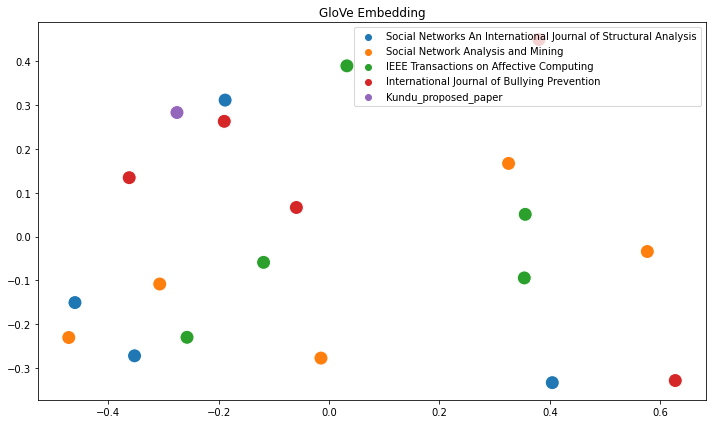

In [ ]:
sent_vector = pd.DataFrame(glove_model_saved.sentence_embeddings)
sent_vector.loc[19] = glove_model_saved.query_vector

pca_breast = PCA(n_components=2)
PCA_journal = pca_breast.fit_transform(sent_vector)

plt.figure(figsize=(10,6))
sns.scatterplot(
    PCA_journal[:,0], PCA_journal[:,1],
    hue=y,
    #palette=sns.color_palette("hls", 10),
    legend="full", s=200,
    alpha=1
)
plt.title('GloVe Embedding')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


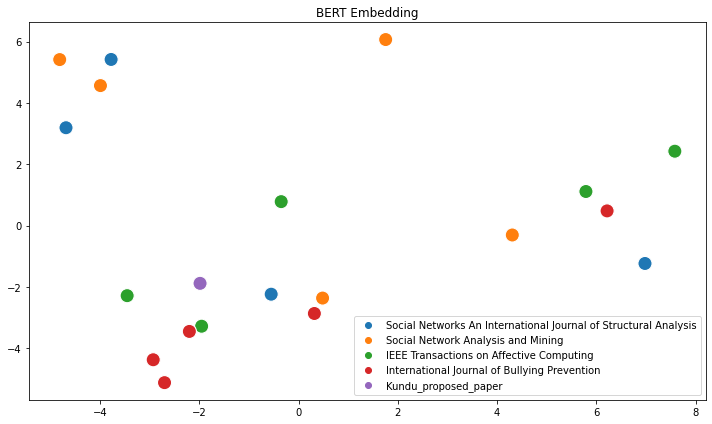

In [ ]:
#sns.scatterplot(PCA_journal[:,0], PCA_journal[:,1])

sent_vector = pd.DataFrame(bert_model_saved.sentence_embeddings)
sent_vector.loc[19] = bert_model_saved.query_vector

pca_breast = PCA(n_components=2)
PCA_journal = pca_breast.fit_transform(sent_vector)

plt.figure(figsize=(10,6))
sns.scatterplot(
    PCA_journal[:,0], PCA_journal[:,1],
    hue=y,
    #palette=sns.color_palette("hls", 10),
    legend="full", s=200,
    alpha=1
)
plt.title('BERT Embedding')

plt.tight_layout()
plt.show()